<a href="https://colab.research.google.com/github/hongseoi/data_analysis/blob/main/%5B%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%B0%8F_%EB%94%A5%EB%9F%AC%EB%8B%9D%5D_%EA%B3%BC%EC%A0%9C1_Linear_Regression_2016110838_%ED%99%8D%EC%84%9C%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [머신러닝 및 딥러닝] 과제1_Linear Regression
2016110838 행정학전공 홍서이


#라이브러리 삽입


In [ ]:
import pandas as pd
import numpy as np

#trainset, testset 분리 위한 모듈
from sklearn.model_selection import train_test_split

#그래프 설정
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# 데이터프레임 생성





In [ ]:
#키, 몸무게 데이터 생성 후 데이터프레임으로 전환
height_lst = [120,121,122,123,145,124,178,164,162,167,183,192,145,163,160,174,132,183,164,178,139,146,175,185,166,174,163,158,159,132]
weight_lst = [22,37,42,33,55,34,78,54,52,57,88,82,55,73,50,84,42,93,63,88,44,36,65,75,56,54,58,55,45,25]

df = pd.DataFrame({
    'height':height_lst,
    'weight':weight_lst
})

print("데이터크기:", df.shape)
df.head()

데이터크기: (30, 2)


,height,weight
0,120,22
1,121,37
2,122,42
3,123,33
4,145,55


In [ ]:
#train test set 분리
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

train_set.shape

(24, 2)

# 데이터 분포 시각화

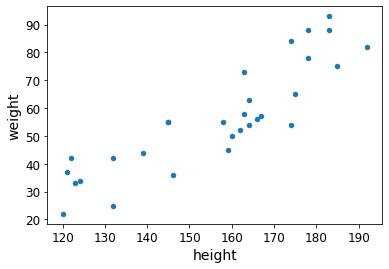

In [ ]:
df.plot(kind='scatter', x="height", y='weight')

# 정규방정식을 활용한 모델 생성 및 예측값 출력

In [ ]:
X = df['height'].to_numpy().reshape(-1,1)
y = df['weight'].values.reshape(-1,1)

print(X)
print(y)

[[120]
 [121]
 [122]
 [123]
 [145]
 [124]
 [178]
 [164]
 [162]
 [167]
 [183]
 [192]
 [145]
 [163]
 [160]
 [174]
 [132]
 [183]
 [164]
 [178]
 [139]
 [146]
 [175]
 [185]
 [166]
 [174]
 [163]
 [158]
 [159]
 [132]]
[[22]
 [37]
 [42]
 [33]
 [55]
 [34]
 [78]
 [54]
 [52]
 [57]
 [88]
 [82]
 [55]
 [73]
 [50]
 [84]
 [42]
 [93]
 [63]
 [88]
 [44]
 [36]
 [65]
 [75]
 [56]
 [54]
 [58]
 [55]
 [45]
 [25]]


In [ ]:
X_b = np.c_[np.ones((30, 1)), X]

#위의 세타 햇 구하는 식
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(X_b)
print(theta_best)

[[  1. 120.]
 [  1. 121.]
 [  1. 122.]
 [  1. 123.]
 [  1. 145.]
 [  1. 124.]
 [  1. 178.]
 [  1. 164.]
 [  1. 162.]
 [  1. 167.]
 [  1. 183.]
 [  1. 192.]
 [  1. 145.]
 [  1. 163.]
 [  1. 160.]
 [  1. 174.]
 [  1. 132.]
 [  1. 183.]
 [  1. 164.]
 [  1. 178.]
 [  1. 139.]
 [  1. 146.]
 [  1. 175.]
 [  1. 185.]
 [  1. 166.]
 [  1. 174.]
 [  1. 163.]
 [  1. 158.]
 [  1. 159.]
 [  1. 132.]]
[[-65.14651911]
 [  0.77696308]]


In [ ]:
X_new = np.array([[120], [200]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[28.08905015],
       [90.24609632]])

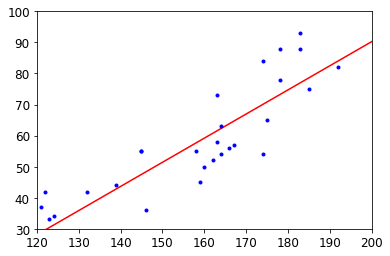

In [ ]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([120, 200, 30, 100])
plt.show()

# 사이킷런을 활용한 모델 생성 및 예측값 출력

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

#세타값, 예측값 출력
lin_reg.intercept_, lin_reg.coef_, lin_reg.predict(X_new)

(array([-65.14651911]), array([[0.77696308]]), array([[28.08905015],
        [90.24609632]]))

##배치 경사 하강법


In [ ]:
#X_bb = X_b[:][:,-1]
#y = y.values.reshape(-1,1)


In [ ]:
eta = 0.1 #학습률
n_iterations = 100 #반복횟수
m = 24 #샘플의 개수

theta = np.random.randn(30,1)


for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) #1000번 반복하면서 GRADIENT 수정
    theta = theta - eta * gradients

print(theta)

ValueError: ignored

In [ ]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([120, 200, 30, 100])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]


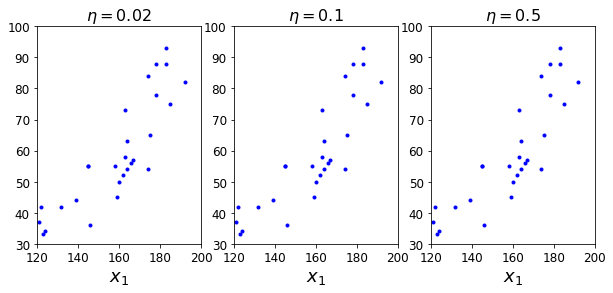

In [ ]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

## 확률적 경사 하강법

In [ ]:
theta_path_sgd = []
m = len(X_b) #샘플개수(첫번째 차원의 길이)
np.random.seed(42)

ValueError: ignored

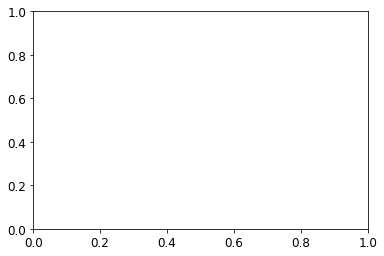

In [ ]:
n_epochs = 50
t0, t1 = 5, 50 #학습스케줄 하이퍼파라미터 

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m): #에폭은 샘플 수만큼 반복. 중복허용하면안되는데 이 코드에선 중복허용하고있ㅇㅁ
        # 과정 그리기
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_b, y_predict, style)  

        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) 
        eta = learning_schedule(epoch * m + i)  #학습할수록에타값줄임
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                

plt.plot(X, y, "b.")                                
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([120, 200, 30, 100])
plt.show()                                           

In [ ]:
#사이킷런에서 사용하기
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[-1.69237132e+10] [5.10661611e+10]


## 미니배치 경사하강법

In [ ]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in subtract


In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

In [ ]:
#뭐가 가장 좋은지: 배치 그러나 컴퓨터 한계로 미니배치를 많이 사용하게될것
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([120, 200, 30, 100])
plt.show()

IndexError: ignored

<Figure size 504x288 with 0 Axes>